In [18]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


In [19]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [20]:
#x_train
# shape는 데이터의 개수
x_train.shape, x_test.shape, y_train.shape, y_test.shape, x_train[0]

((60000, 28, 28),
 (10000, 28, 28),
 (60000,),
 (10000,),
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),  # 픽셀 수
    tf.keras.layers.Dense(128, activation = 'relu'),  # 활성화 함수
    tf.keras.layers.Dropout(0.2),                     # 20퍼센트 무시?
    tf.keras.layers.Dense(10, activation = 'softmax') # 레이어 10? 숫자가 10개, 활성화 함수 softmax 확률 계산 무조건 0, 1로 표현
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.11256877, 0.1340484 , 0.05419761, 0.11323353, 0.05188498,
        0.13698946, 0.11308298, 0.06602446, 0.10523696, 0.11273288]],
      dtype=float32)

In [23]:
predictions.shape

(1, 10)

In [24]:
# 오차 함수 # Crossentropy 수식
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(y_train[:1], predictions).numpy()

2.2660325

In [25]:
# adam 수식
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [26]:
# epochs 반복횟수
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2979 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1487 - accuracy: 0.9568
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1103 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0916 - accuracy: 0.9710
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0770 - accuracy: 0.9754


In [27]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0741 - accuracy: 0.9785 - 600ms/epoch - 2ms/step


[0.07406861335039139, 0.9785000085830688]

In [43]:
path = '/content/drive/MyDrive/test/0-9'

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [44]:
# 데이터 불러오기
dataset = tf.keras.utils.image_dataset_from_directory(path,
                                                      shuffle=True,
                                                        batch_size=10,
                                                        image_size=(160, 160))

Found 426 files belonging to 10 classes.


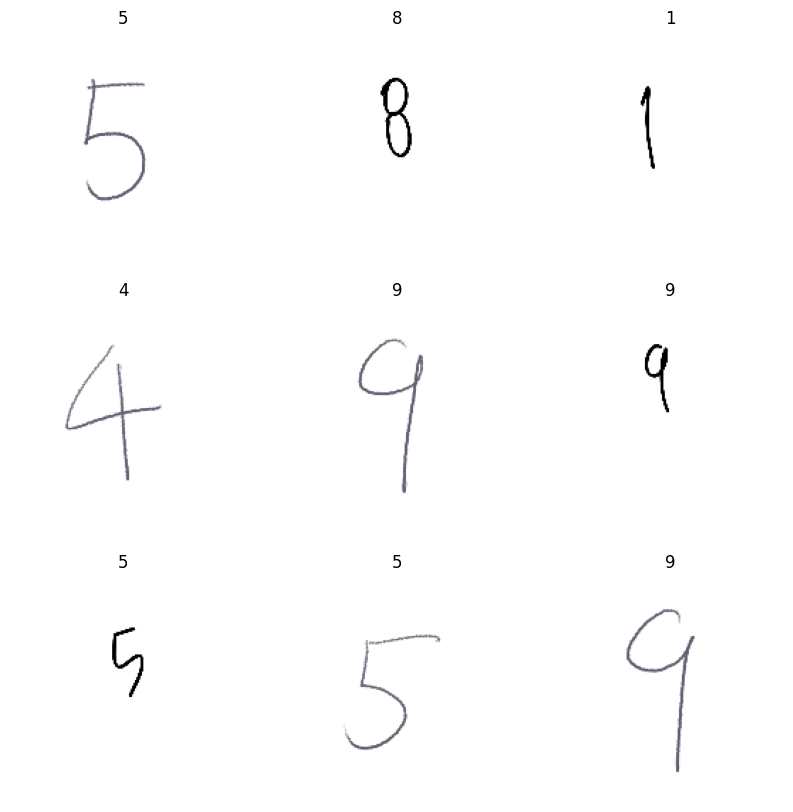

In [45]:
# 라벨 확인하기
class_names = dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [46]:
# 배치 크기로 나누기
batches = tf.data.experimental.cardinality(dataset)
train_dataset = dataset.take(batches * 4 // 5)
test_dataset = dataset.skip(batches * 4 // 5)

print(tf.data.experimental.cardinality(train_dataset))
print(tf.data.experimental.cardinality(test_dataset))

tf.Tensor(34, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [47]:
# 버퍼링된 프리페치로 I/O 차단 없이 디스크에서 이미지 로드(성능향상)
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

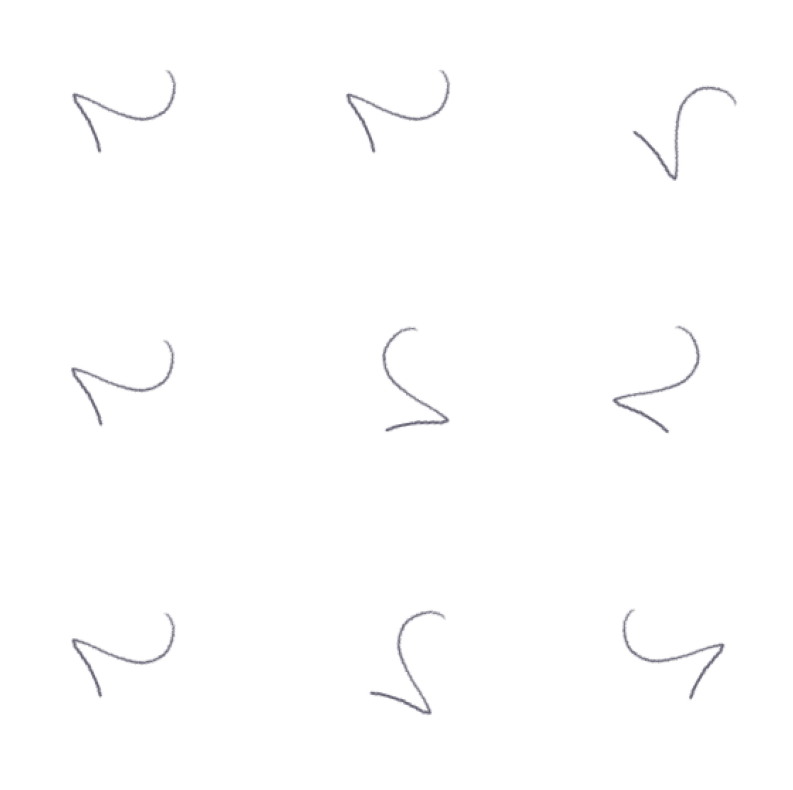

In [48]:
# 데이터 증강 사용
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [49]:
# mobilenet_v2 이미지 분류 모델
# 픽셀값 재조정 -1 ~ 1 의 값, 모델에 맞게 사용
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [50]:
# 전이학습의 기본 모델 설정
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = (160, 160) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 2s 0us/step


In [52]:
# 베이스 모델로의 변환 확인
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(10, 5, 5, 1280)


In [53]:
# 베이스 모델 학습 하지 않음
base_model.trainable = False

In [54]:
# 입력 이미지를 모델에 맞게 변환
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(10, 1280)


In [56]:
# 모델의 출력부 확인
prediction_layer = tf.keras.layers.Dense(10)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

# 출력 (설정한 배치, 숫자)

(10, 10)


In [58]:
# 모델 생성
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)                 # 데이터 증강
x = preprocess_input(x)
x = base_model(x, training=False)             # 쓰려는 모델, 학습 x, 우리 데이터로 학습할거기 때문
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)           # 20프로 버림
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [60]:
# 모델 컴파일
base_learning_rate = 0.0001
# 활성화 함수 Adam
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [63]:
# 모델의 학습 가능 매개변수 확인
len(model.trainable_variables)

2

In [64]:
initial_epochs = 10

In [65]:
# 10 학습 후 결과
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset)

Epoch 1/10
34/34 [==============================] - 111s 3s/step - loss: 2.5721 - accuracy: 0.1206 - val_loss: 2.3509 - val_accuracy: 0.1395
Epoch 2/10
34/34 [==============================] - 7s 199ms/step - loss: 2.1750 - accuracy: 0.2000 - val_loss: 2.0484 - val_accuracy: 0.2442
Epoch 3/10
34/34 [==============================] - 9s 255ms/step - loss: 1.9457 - accuracy: 0.2853 - val_loss: 1.8451 - val_accuracy: 0.3256
Epoch 4/10
34/34 [==============================] - 9s 248ms/step - loss: 1.7308 - accuracy: 0.4235 - val_loss: 1.7315 - val_accuracy: 0.4419
Epoch 5/10
34/34 [==============================] - 8s 204ms/step - loss: 1.5894 - accuracy: 0.4588 - val_loss: 1.5456 - val_accuracy: 0.5000
Epoch 6/10
34/34 [==============================] - 9s 253ms/step - loss: 1.4314 - accuracy: 0.5706 - val_loss: 1.4420 - val_accuracy: 0.5581
Epoch 7/10
34/34 [==============================] - 7s 203ms/step - loss: 1.3013 - accuracy: 0.6059 - val_loss: 1.2385 - val_accuracy: 0.6744
Epoch 8

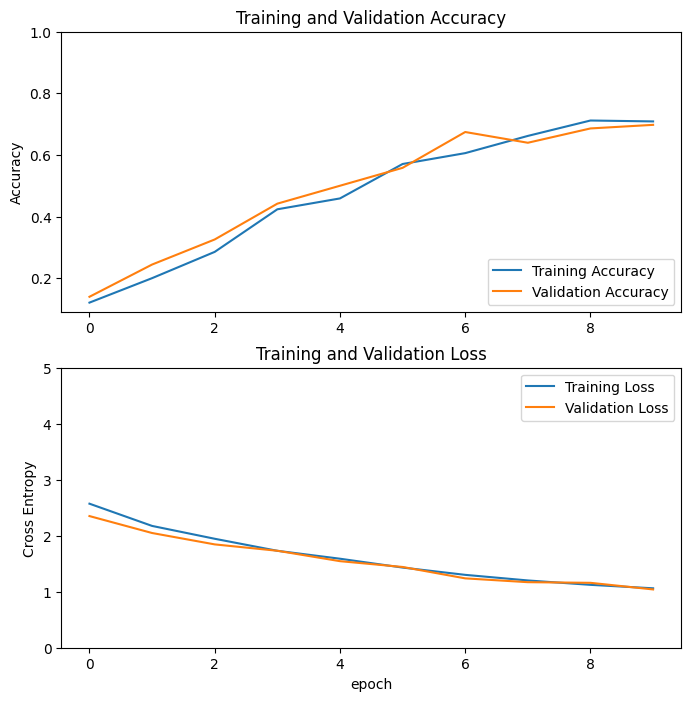

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [68]:
# 모델 미세 조정
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model:  154


In [69]:
# 컴파일 옵션 지정, RMSprop 수식
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 160, 160, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 160, 160, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                           

In [70]:
# 모델의 학습 가능 매개변수 확인
len(model.trainable_variables)

56

In [71]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset)

Epoch 10/20
34/34 [==============================] - 18s 304ms/step - loss: 0.6852 - accuracy: 0.8000 - val_loss: 0.4187 - val_accuracy: 0.8837
Epoch 11/20
34/34 [==============================] - 9s 252ms/step - loss: 0.3894 - accuracy: 0.8853 - val_loss: 0.3262 - val_accuracy: 0.8837
Epoch 12/20
34/34 [==============================] - 8s 206ms/step - loss: 0.3243 - accuracy: 0.9118 - val_loss: 0.1975 - val_accuracy: 0.9884
Epoch 13/20
34/34 [==============================] - 9s 259ms/step - loss: 0.2227 - accuracy: 0.9588 - val_loss: 0.1444 - val_accuracy: 0.9767
Epoch 14/20
34/34 [==============================] - 8s 219ms/step - loss: 0.2140 - accuracy: 0.9441 - val_loss: 0.0998 - val_accuracy: 1.0000
Epoch 15/20
34/34 [==============================] - 9s 234ms/step - loss: 0.1325 - accuracy: 0.9618 - val_loss: 0.1189 - val_accuracy: 0.9884
Epoch 16/20
34/34 [==============================] - 9s 256ms/step - loss: 0.1270 - accuracy: 0.9765 - val_loss: 0.0833 - val_accuracy: 1.000

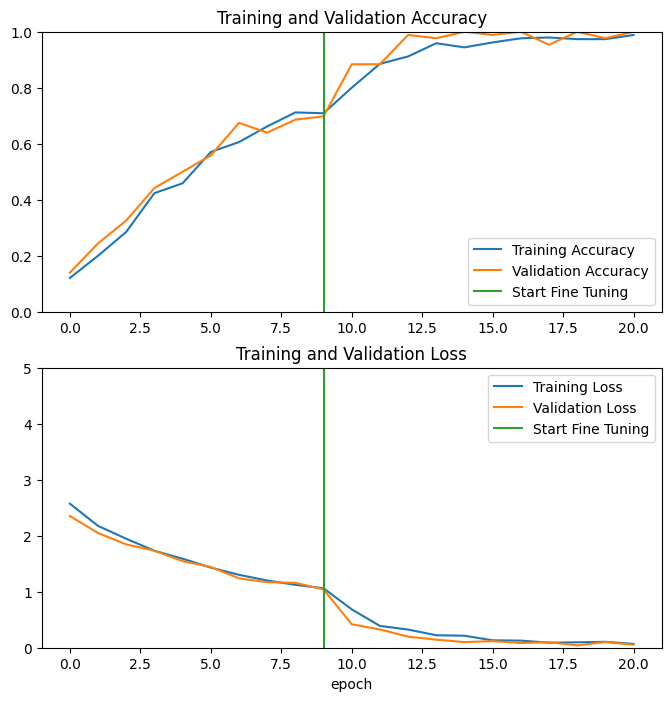

In [72]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 5.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [73]:
loss, accuracy = model.evaluate(train_dataset)
print('Train accuracy :', accuracy)

loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

34/34 [==============================] - 6s 139ms/step - loss: 0.0516 - accuracy: 0.9882
Train accuracy : 0.9882352948188782
9/9 [==============================] - 4s 14ms/step - loss: 0.0739 - accuracy: 0.9884
Test accuracy : 0.9883720874786377


1/1 [==============================] - 1s 1s/step


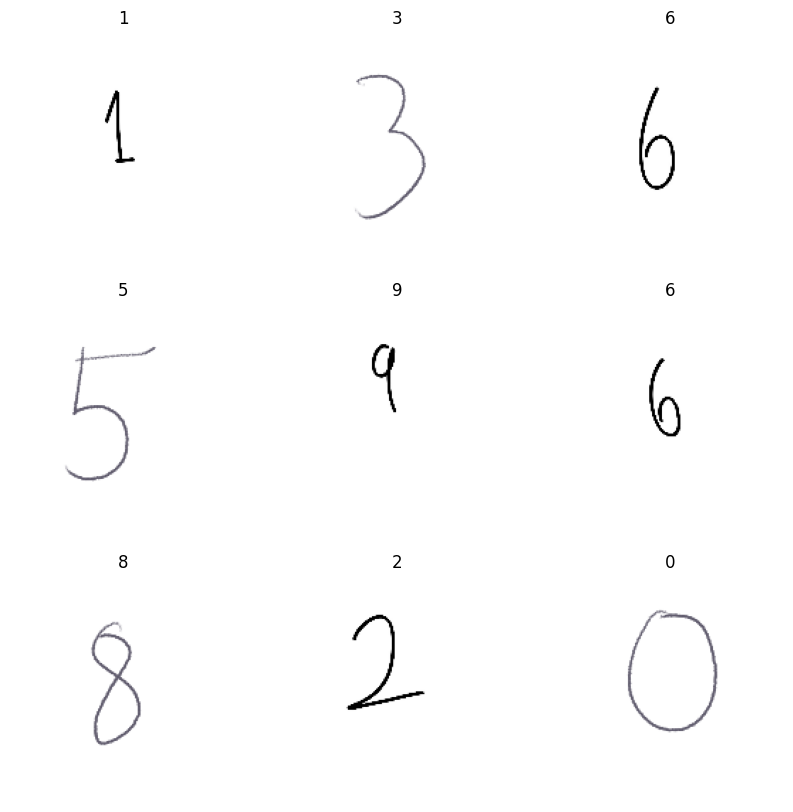

In [74]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict(image_batch)

label = predictions.argmax(axis=1)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(label[i])
    plt.axis("off")